In [3]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch
from glob import glob
import gc
import tensorflow as tf
import keras.preprocessing.image
%matplotlib inline 

Using TensorFlow backend.


# PICTURES INPUT

In [1]:
import cv2

In [2]:
from os import listdir

In [4]:
listdir('/Users/linhdao/Ironhack/data-labs/Weekly Projects/Week 7/IDC_regular_ps50_idx5')

['9036',
 '10268',
 '10257',
 '8913',
 '13613',
 '8914',
 '15510',
 '10259',
 '16165',
 '10292',
 '12951',
 '10261',
 '10295',
 '9259',
 '12750',
 '13020',
 '16552',
 '12905',
 '9266',
 '16555',
 '13018',
 '9261',
 '9257',
 '12934',
 '12933',
 '9250',
 '10260',
 '10258',
 '10293',
 '9037',
 '10269',
 '16531',
 '10256',
 '15516',
 '12932',
 '12935',
 '9256',
 '16554',
 '9260',
 '13019',
 '16553',
 '13021',
 '8984',
 '9258',
 '12751',
 '9267',
 '12876',
 '12882',
 '15634',
 '12871',
 '14188',
 '15633',
 '9324',
 '12878',
 '.DS_Store',
 '9323',
 '9383',
 '8867',
 '9346',
 '9174',
 '12822',
 '9173',
 '9322',
 '9325',
 '12879',
 '14189',
 '12870',
 '12884',
 '12241',
 '15632',
 '12883',
 '12877',
 '9126',
 '13106',
 '12823',
 '13591',
 '9175',
 '12824',
 '9347',
 '9181',
 '9382',
 '10307',
 '13916',
 '10300',
 '14306',
 '15471',
 '16896',
 '14156',
 '9135',
 '12890',
 '12897',
 '10308',
 '10301',
 '10306',
 '12896',
 '14157',
 '12891',
 '12898',
 '14192',
 '13458',
 '9083',
 '9077',
 '13460

In [6]:
imagePatches = glob('/Users/linhdao/Ironhack/data-labs/Weekly Projects/Week 7/IDC_regular_ps50_idx5/**/*.png', recursive=True)

In [7]:
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)

In [8]:
len(classZero)

198738

In [9]:
len(classOne)

78786

In [10]:
len(imagePatches)

277524

## TRANSFORMING ALL PICTURES INTO ARRAY

In [11]:
image = cv2.imread('/Users/linhdao/Ironhack/data-labs/Weekly Projects/Week 7/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1251_y1101_class0.png')#, gray_scale=True)

In [12]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

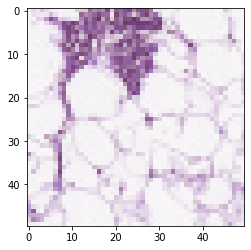

In [13]:
plt.imshow(image)

In [151]:
#def process_images(lowerIndex,upperIndex):
#    x = []
#    y = []
#    WIDTH = 50
#    HEIGHT = 50
#    for img in imagePatches[lowerIndex:upperIndex]:
#        full_size_image = cv2.imread(img)
#        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
#        #x1 = np.array(x)
#        y.append(0 if img in classZero else )
#    return x,y

#X,Y= process_images(0,90000)

In [14]:
# Getting images in class 0 in array:
X_0 = []
y_0 = []
WIDTH = 50
HEIGHT = 50
for img in classZero:
    image = cv2.imread(img)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_0.append(cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
    y_0.append(0)

In [15]:
X_1 = []
y_1 = []
WIDTH = 50
HEIGHT = 50
for img in classOne:
    image = cv2.imread(img)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    X_1.append(cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
    y_1.append(1)

In [16]:
X1 = np.array(X_1)
X0 = np.array(X_0)
y0 = np.array(y_0)
y1 = np.array(y_1)

In [17]:
X = np.concatenate((X1, X0))

In [23]:
y = np.concatenate((y1,y0))

# Visualization

Text(0, 0.5, 'Intensity')

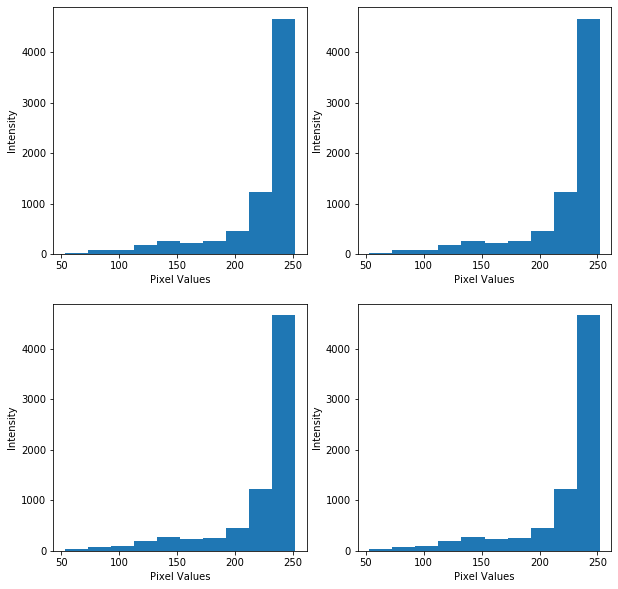

In [19]:
image = cv2.imread('/Users/linhdao/Ironhack/data-labs/Weekly Projects/Week 7/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1251_y1101_class0.png')#, gray_scale=True)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(2, 2,1)
#view_images(image)
#plt.subplot(2, 2,2)
plt.hist(image.ravel()) # Flatten the numpy array
plt.xlabel('Pixel Values')
plt.ylabel('Intensity')
plt.subplot(2, 2,2)
plt.hist(image.ravel()) # Flatten the numpy array
plt.xlabel('Pixel Values')
plt.ylabel('Intensity')
plt.subplot(2, 2,3)
plt.hist(image.ravel()) # Flatten the numpy array
plt.xlabel('Pixel Values')
plt.ylabel('Intensity')
plt.subplot(2, 2,4)
plt.hist(image.ravel()) # Flatten the numpy array
plt.xlabel('Pixel Values')
plt.ylabel('Intensity')


In [245]:
def plotHistogram_1(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    plt.title('IDC(+)' if y[1] else 'IDC(-)')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

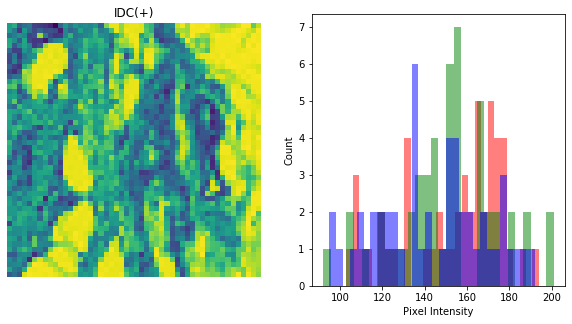

In [246]:
plotHistogram_1(X[1])

In [36]:
X[20].shape

(50, 50, 3)

In [289]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    x=0
    plt.figure(figsize=(15,5*len(a)))
    for i in range(len(a)): 
        plt.subplot(len(a),2,x+1)
        plt.imshow(a[i])
        plt.axis('off')
        x +=1
        plt.title('IDC(+)' if y[i] == 1 else 'IDC(-)')
        histo = plt.subplot(len(a),2,x+1)
        histo.set_ylabel('Count')
        histo.set_xlabel('Pixel Intensity')
        n_bins = 30
        plt.hist(a[i][:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
        x+=1

In [272]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    x=0
    plt.figure(figsize=(15,5*len(a)))
    for j in a: 
        for i in range(len(a)): 
            plt.subplot(len(a),2,x+1)
            plt.imshow(a[i])
            plt.axis('off')
            x +=1
            plt.title('IDC(+)' if y[a.index(j)] == 1 else 'IDC(-)')
            histo = plt.subplot(len(a),2,x+1)
            histo.set_ylabel('Count')
            histo.set_xlabel('Pixel Intensity')
            n_bins = 30
            plt.hist(a[i][:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    
            x+=1

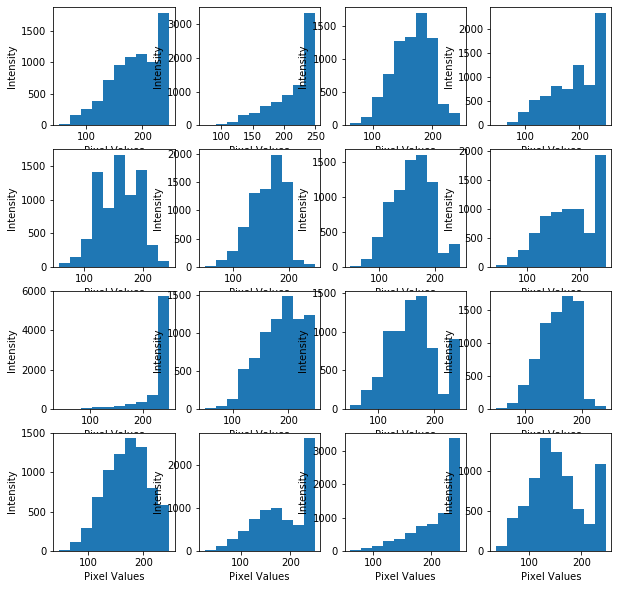

In [20]:
x = 0
plt.figure(figsize=(10,10))
for i in X[1:17]:
    plt.subplot(4,4,x+1)
    plt.hist(i.ravel()) # Flatten the numpy array
    plt.xlabel('Pixel Values')
    plt.ylabel('Intensity')
    x +=1

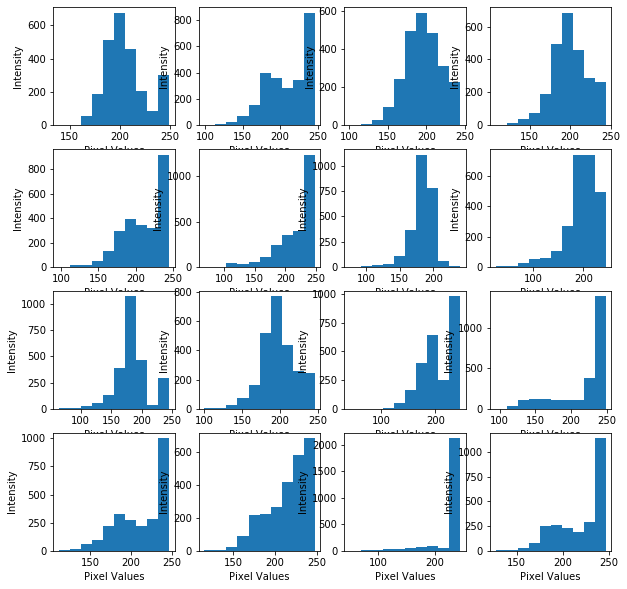

In [302]:
x = 0
plt.figure(figsize=(10,10))
for i in X[(len(X)-16):len(X)]:
    plt.subplot(4,4,x+1)
    plt.hist(i.ravel()) # Flatten the numpy array
    plt.xlabel('Pixel Values')
    plt.ylabel('Intensity')
    x +=1

In [18]:
X[10].shape

(50, 50, 3)

ValueError: num must be 1 <= num <= 8, not 9

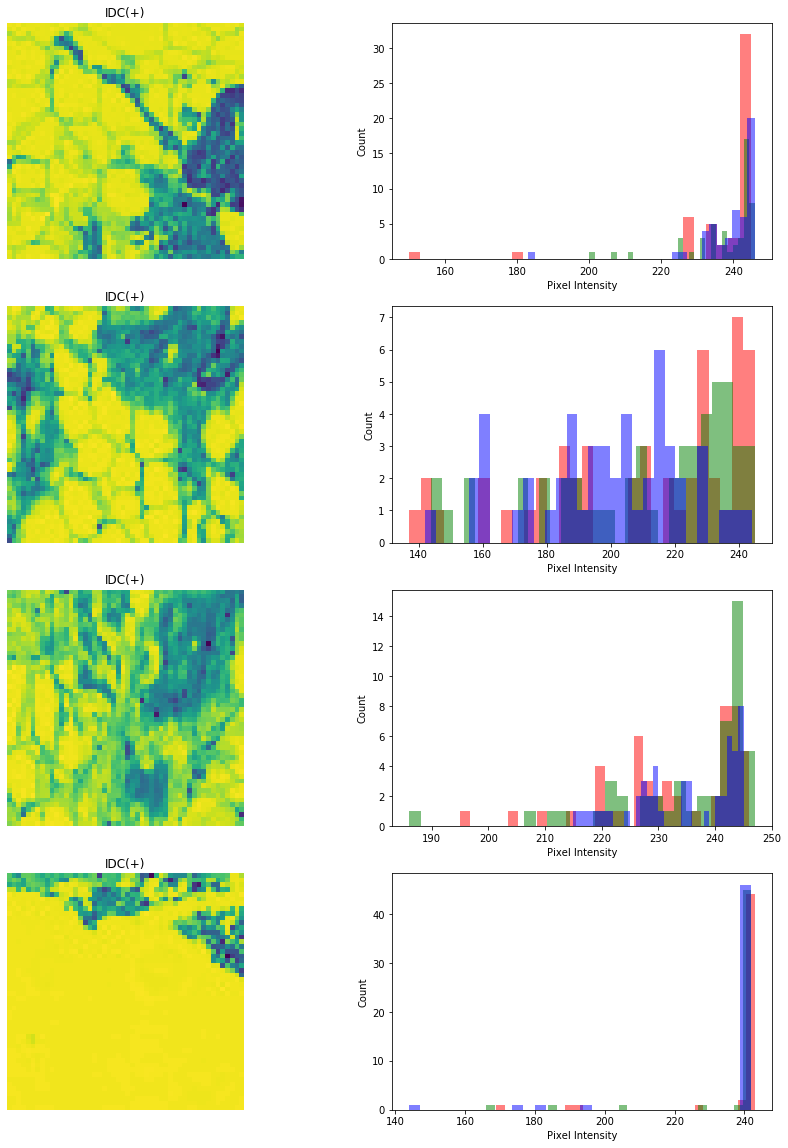

In [275]:
plotHistogram(X[277519:277523])

In [51]:
df = pd.DataFrame()

In [52]:
df['label'] = y

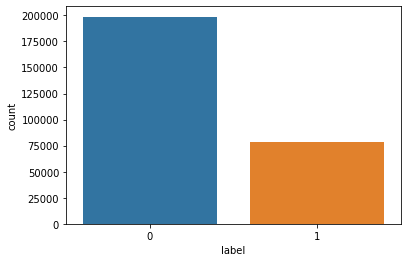

In [53]:
lab = df['label']
dist = lab.value_counts()
sns.countplot(lab)

# Train test validation spliting

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X.shape

(277524, 50, 50, 3)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=1/3, random_state=1)

In [27]:
X_train.shape

(194266, 50, 50, 3)

In [28]:
X_test.shape

(55505, 50, 50, 3)

In [29]:
X_val.shape

(27753, 50, 50, 3)

# Modelling with Keras

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [32]:
Y_train = np_utils.to_categorical(y_train, 2)
Y_val = np_utils.to_categorical(y_val, 2)
Y_test = np_utils.to_categorical(y_test, 2)

In [236]:
#Model definition: let keras know that we will arrange layers on top of each other 
model = Sequential()
 
# Adding 1st convoltional layer with 32 layers, size 3*3 each, activation function = 'relu'
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding 2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer: change tensor to vector
model.add(Flatten())

# Add Fully Connected layer with 128 nodes 
model.add(Dense(128, activation='sigmoid'))

# Output layer with 2 nodes
model.add(Dense(2, activation='softmax'))

In [237]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [238]:
H = model.fit(X_train, Y_train , validation_data=(X_val, Y_val),
          batch_size=320, epochs=10)

Train on 166514 samples, validate on 55505 samples
Epoch 1/10
166514/166514 [==============================] - 231s 1ms/step - loss: 0.6769 - accuracy: 0.7166 - val_loss: 0.5968 - val_accuracy: 0.7162
Epoch 2/10
166514/166514 [==============================] - 233s 1ms/step - loss: 0.5956 - accuracy: 0.7175 - val_loss: 0.5966 - val_accuracy: 0.7162
Epoch 3/10
166514/166514 [==============================] - 235s 1ms/step - loss: 0.5958 - accuracy: 0.7175 - val_loss: 0.5966 - val_accuracy: 0.7162
Epoch 4/10
166514/166514 [==============================] - 237s 1ms/step - loss: 0.5959 - accuracy: 0.7175 - val_loss: 0.5976 - val_accuracy: 0.7162
Epoch 5/10
166514/166514 [==============================] - 235s 1ms/step - loss: 0.5960 - accuracy: 0.7175 - val_loss: 0.5967 - val_accuracy: 0.7162
Epoch 6/10
166514/166514 [==============================] - 236s 1ms/step - loss: 0.5960 - accuracy: 0.7175 - val_loss: 0.5988 - val_accuracy: 0.7162
Epoch 7/10
158720/166514 [=======================

KeyboardInterrupt: 

In [132]:
score = model.evaluate(X_test, Y_test)

55505/55505 [==============================] - 28s 509us/step


In [133]:
print(score)

[0.600420751775474, 0.71195387840271]


In [145]:
#Model definition: let keras know that we will arrange layers on top of each other 
model1 = Sequential()
model1.add(Conv2D(32,(3, 3), activation='relu', input_shape=(50,50,3)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

In [146]:
H1 = model1.fit(X_train, Y_train , validation_data=(X_val, Y_val),
          batch_size=100, epochs=3)

Train on 166514 samples, validate on 55505 samples
Epoch 1/3
166514/166514 [==============================] - 672s 4ms/step - loss: 1.3516 - accuracy: 0.7146 - val_loss: 0.5959 - val_accuracy: 0.7162
Epoch 2/3
166514/166514 [==============================] - 706s 4ms/step - loss: 0.6026 - accuracy: 0.7175 - val_loss: 0.5964 - val_accuracy: 0.7162
Epoch 3/3
166514/166514 [==============================] - 658s 4ms/step - loss: 0.5989 - accuracy: 0.7175 - val_loss: 0.5957 - val_accuracy: 0.7162


# Model

In [35]:
#Model definition: let keras know that we will arrange layers on top of each other 
model1 = Sequential()

# Add 1st layer
model1.add(Conv2D(32,(3, 3), activation='relu', input_shape=(50,50,3), strides=2))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

#Add 2nd layer
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Flatten
model1.add(Flatten())

# Full connection
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))

# Compiling the CNN
model1.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
# Choose the best number of epochs
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [36]:
H2 = model1.fit(X_train, Y_train , validation_data=(X_val, Y_val),
          batch_size=300, epochs=20, verbose=1, callbacks=[checkpointer])


Train on 194266 samples, validate on 27753 samples
Epoch 1/20
194266/194266 [==============================] - 101s 521us/step - loss: 1.1084 - accuracy: 0.7277 - val_loss: 0.5877 - val_accuracy: 0.6938

Epoch 00001: val_accuracy improved from -inf to 0.69376, saving model to best_weights.hdf5
Epoch 2/20
194266/194266 [==============================] - 82s 422us/step - loss: 0.4549 - accuracy: 0.7942 - val_loss: 0.5342 - val_accuracy: 0.7975

Epoch 00002: val_accuracy improved from 0.69376 to 0.79750, saving model to best_weights.hdf5
Epoch 3/20
194266/194266 [==============================] - 72s 370us/step - loss: 0.4257 - accuracy: 0.8132 - val_loss: 0.4541 - val_accuracy: 0.8339

Epoch 00003: val_accuracy improved from 0.79750 to 0.83389, saving model to best_weights.hdf5
Epoch 4/20
194266/194266 [==============================] - 90s 462us/step - loss: 0.4131 - accuracy: 0.8220 - val_loss: 0.4665 - val_accuracy: 0.8322

Epoch 00004: val_accuracy did not improve from 0.83389
Epoch

In [37]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

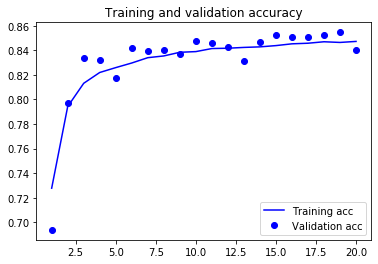

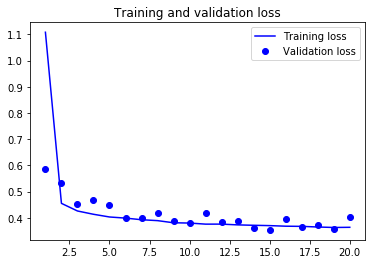

In [38]:
acc = H2.history['accuracy']
val_acc = H2.history['val_accuracy']
loss = H2.history['loss']
val_loss = H2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
model1.load_weights('best_weights.hdf5')

In [40]:
model1.save('cancer_accuracy.h5')

### Checking with test 

In [902]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score

In [903]:
y_pred_test = model1.predict(X_test)

In [982]:
THRESHOLD = 0.45
y_pred_test = np.round(y_pred, 2)
y_pred_test1 = np.where(y_pred_test>THRESHOLD,1,0)[:,1] #take all the columns, rows =1
cm_test = confusion_matrix(y_test, y_pred_test1)

In [983]:
cm_test

array([[34452,  5224],
       [ 3177, 12652]])

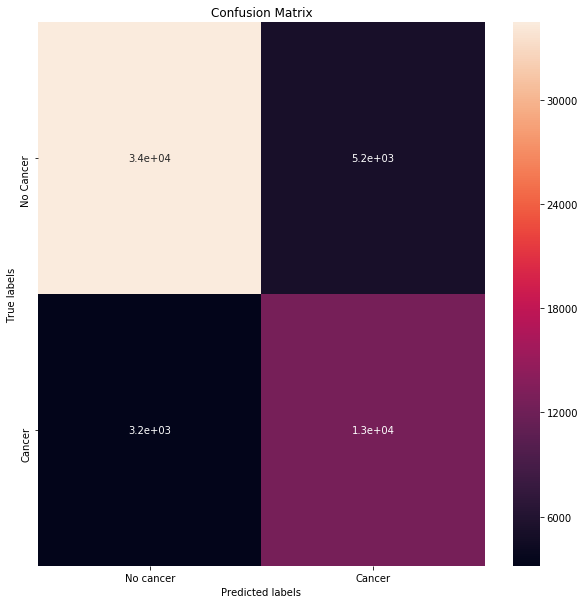

In [986]:
import seaborn as sns
    
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No cancer', 'Cancer']); ax.yaxis.set_ticklabels(['No Cancer', 'Cancer']);

In [918]:
print(f'f1 score (test): {f1_score(y_test,  y_pred_test1)}')
print(f'precision score (test): {precision_score(y_test,  y_pred_test1)}')
print(f'recall score (test): {recall_score(y_test,  y_pred_test1)}')

f1 score (test): 0.7507491470108292
precision score (test): 0.7077646005817856
recall score (test): 0.799292437930381


### Checking with train

In [907]:
y_pred_train = model1.predict(X_train)

In [1056]:
THRESHOLD = 0.45
y_pred_train1 = np.round(y_pred_train, 2)
y_pred_train1 = np.where(y_pred_train1>THRESHOLD,1,0)[:,1] #take all the columns, rows =1
cm_train = confusion_matrix(y_train, y_pred_train1)

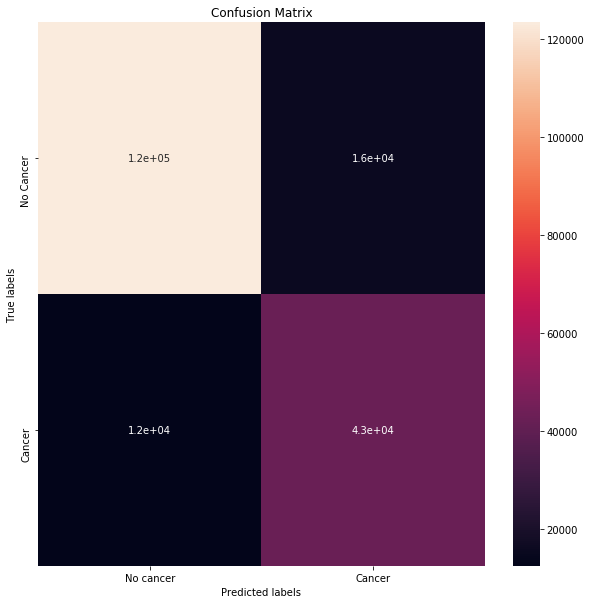

In [1057]:
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No cancer', 'Cancer']); ax.yaxis.set_ticklabels(['No Cancer', 'Cancer']);

In [920]:
print(f'f1 score (test): {f1_score(y_train, y_pred_train1)}')
print(f'precision score (test): {precision_score(y_train, y_pred_train1)}')
print(f'recall score (test): {recall_score(y_train, y_pred_train1)}')

f1 score (test): 0.7503837670930744
precision score (test): 0.7283438945024833
recall score (test): 0.7737991266375546


### Checking with validated data

In [921]:
y_pred_val = model1.predict(X_val)

In [922]:
THRESHOLD = 0.45
y_pred_val1 = np.round(y_pred_val, 2)
y_pred_val1 = np.where(y_pred_val1>THRESHOLD,1,0)[:,1] #take all the columns, rows =1
confusion_matrix(y_val, y_pred_val1)

array([[17451,  2305],
       [ 1810,  6187]])

In [923]:
print(f'f1 score (val): {f1_score(y_val, y_pred_val1)}')
print(f'precision_score (val): {precision_score(y_val,y_pred_val1)}')
print(f'recall_score (val): {recall_score(y_val, y_pred_val1)}')

f1 score (val): 0.7504396870641034
precision_score (val): 0.7285680640602921
recall_score (val): 0.7736651244216581


In [924]:
confusion_matrix(y_test, Y_pred_classes)

array([[35802,  3874],
       [ 4129, 11700]])

In [1070]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test1)

In [1081]:
print((y_test==0).sum())
print((y_test==1).sum())


39676
15829


In [964]:
roc_auc = auc(fpr, tpr)

In [971]:
y_pred_test

array([[0.6 , 0.4 ],
       [0.26, 0.74],
       [0.26, 0.74],
       ...,
       [0.91, 0.09],
       [0.21, 0.79],
       [0.24, 0.76]], dtype=float32)

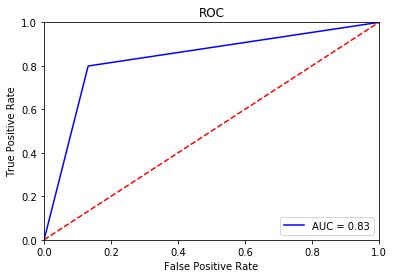

In [965]:
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Predicting: 

In [67]:
img = X_test[y_test==1][100]

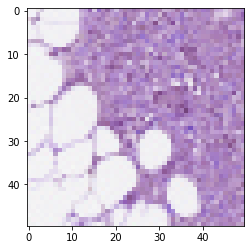

In [73]:
plt.imshow(img)

In [70]:
img_reshape = img.reshape(1,50,50,3)

In [71]:
y_pred_1 = model1.predict(img_reshape)
y_pred_1 = np.where(y_pred_1>0.45,1,0)
y_pred_class_1 = np.argmax(y_pred_1,axis=1)
print(f'Class {y_pred_class_1}')

Class [0]


## Plotting layers:

In [932]:
layer_outputs = [i.output for i in model1.layers[:6]] 
# get the out put of the layers


In [933]:
len(layer_outputs)

6

In [934]:
from keras import models

activation_model = models.Model(inputs=model1.input, outputs=layer_outputs) 
# Creates a model that will return these outputs, given the model input

In [935]:
model1.input

<tf.Tensor 'conv2d_147_input:0' shape=(?, 50, 50, 3) dtype=float32>

In [936]:
#img = np.expand_dims(img, axis=0)

In [937]:
activations = activation_model.predict(img_reshape)

In [938]:
activations[5].shape

(1, 5, 5, 64)

In [939]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)  # we defined 32 chanels at the beginning

(1, 24, 24, 32)


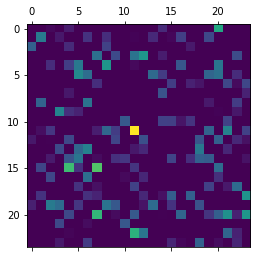

In [940]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')  # 4 channels of the first activation layers

In [941]:
layer_names = [i for i in model1.layers[:6]]

The zip() function takes:
- iterables – can be built-in iterables (like a list, string, dict), or user-defined iterables (an object that has an __iter__ method).

The zip() function returns the iterator of tuples based on an iterable object.
- If no parameters are passed on zip function then, zip() returns the empty iterator
- If a single iterable is passed to the zip function then, zip() returns the iterator of 1-tuples. Meaning, the number of items in each tuple is 1.
- If multiple iterables are passed, ith tuple contains ith Suppose, two iterables are passed; one iterable containing 3 and other containing five elements. Then, a returned iterator has three tuples. It’s because iterator stops when the shortest iterable is exhausted.

In [942]:
layer_names

In [943]:
activations

[array([[[[ 0.        , 29.76458   ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  8.317395  ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [10.285893  ,  3.1632924 ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          ...,
          [ 3.2128012 ,  2.6641603 ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  4.670348  ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  2.6096761 ,  0.        , ...,  0.        ,
            0.        ,  0.        ]],
 
         [[ 0.8341429 , 41.07463   ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [17.731464  ,  3.2447858 ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [36.226154  , 24.100536  ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          ...,
          [ 0

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


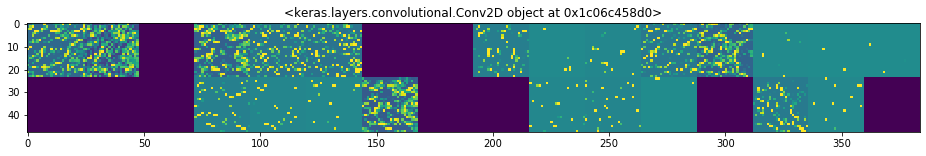

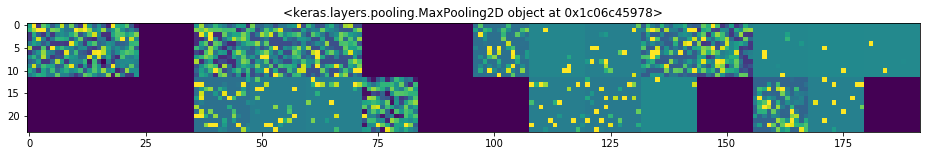

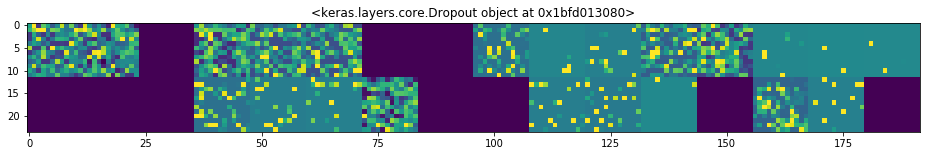

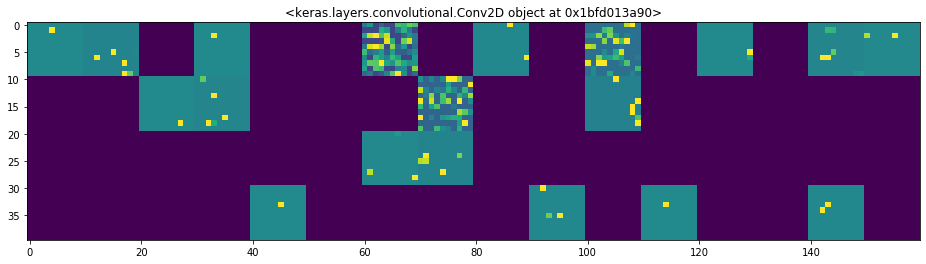

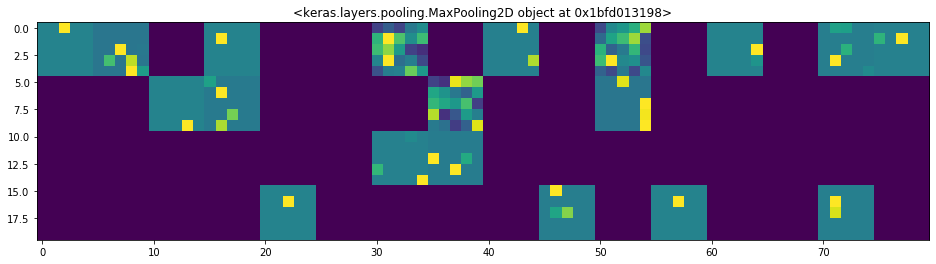

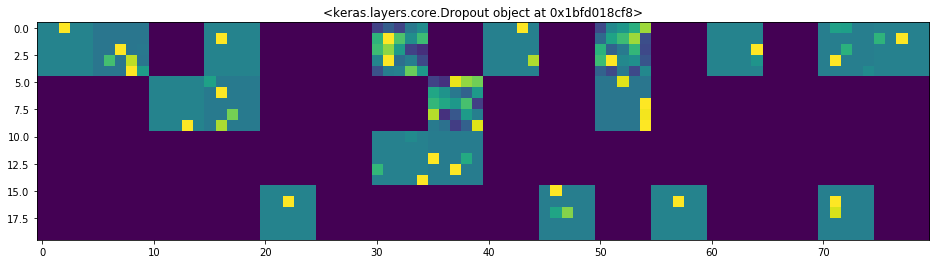

In [944]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Try with different pics: 

In [41]:
image_face = cv2.imread('/Users/linhdao/Ironhack/data-labs/Weekly Projects/Week 7/Bureau-Collective-Diversity-of-the-Human-Face-01.jpg',cv2.COLOR_BGR2RGB)

In [43]:
image_face = cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB)

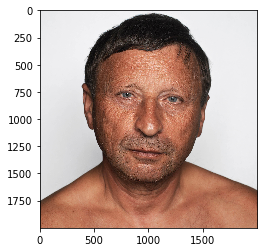

In [44]:
plt.imshow(image_face) 

In [1040]:
image_face.shape

(2000, 2000, 3)

In [1041]:
face = cv2.resize(image_face, (50,50), interpolation=cv2.INTER_CUBIC)

In [1042]:
face.shape

(50, 50, 3)

In [1043]:
layer_outputs = [i.output for i in model1.layers[:6]] 
# get the out put of the layers


In [1044]:
from keras import models

activation_model = models.Model(inputs=model1.input, outputs=layer_outputs) 
# Creates a model that will return these outputs, given the model input

In [1045]:
model1.input

<tf.Tensor 'conv2d_147_input:0' shape=(?, 50, 50, 3) dtype=float32>

In [1046]:
face = np.expand_dims(face, axis=0)

In [1047]:
activations_face = activation_model.predict(face)

In [1048]:
activations_face[5].shape

(1, 5, 5, 64)

In [1049]:
first_layer_activation_face = activations_face[0]
print(first_layer_activation_face.shape)  # we defined 32 chanels at the beginning

(1, 24, 24, 32)


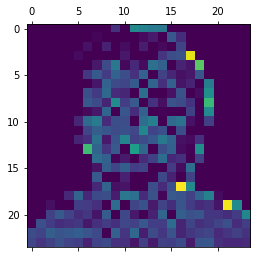

In [1050]:
plt.matshow(first_layer_activation_face[0, :, :, 4], cmap='viridis')  # 4 channels of the first activation layers

In [1051]:
layer_names = [i for i in model1.layers[:6]]

The zip() function takes:
- iterables – can be built-in iterables (like a list, string, dict), or user-defined iterables (an object that has an __iter__ method).

The zip() function returns the iterator of tuples based on an iterable object.
- If no parameters are passed on zip function then, zip() returns the empty iterator
- If a single iterable is passed to the zip function then, zip() returns the iterator of 1-tuples. Meaning, the number of items in each tuple is 1.
- If multiple iterables are passed, ith tuple contains ith Suppose, two iterables are passed; one iterable containing 3 and other containing five elements. Then, a returned iterator has three tuples. It’s because iterator stops when the shortest iterable is exhausted.

In [1052]:
layer_names

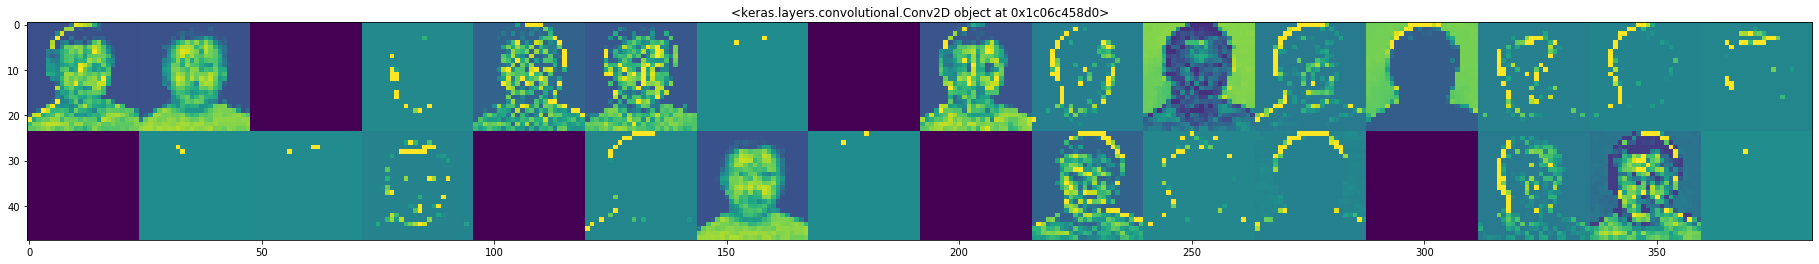

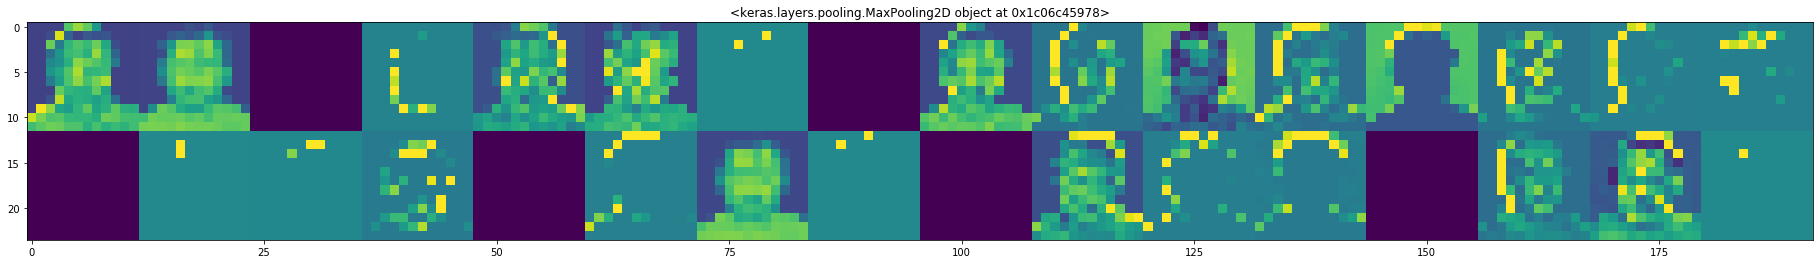

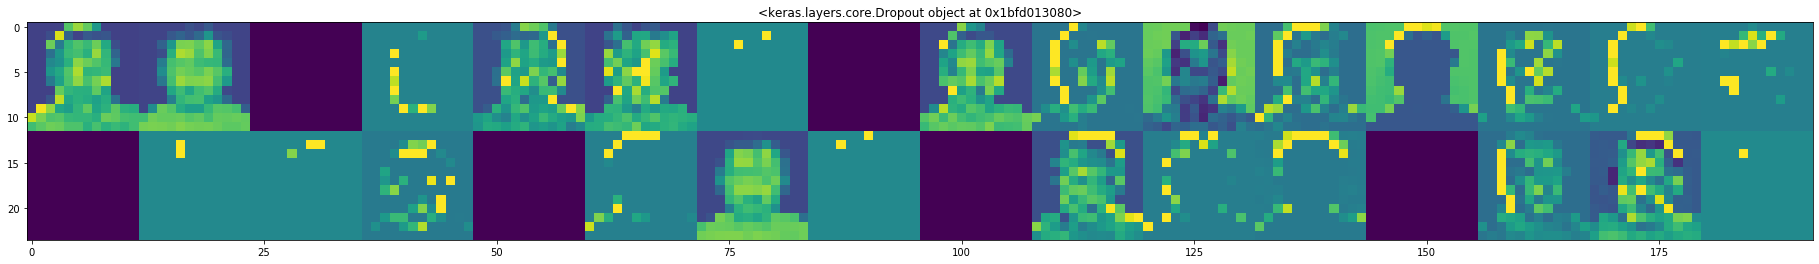

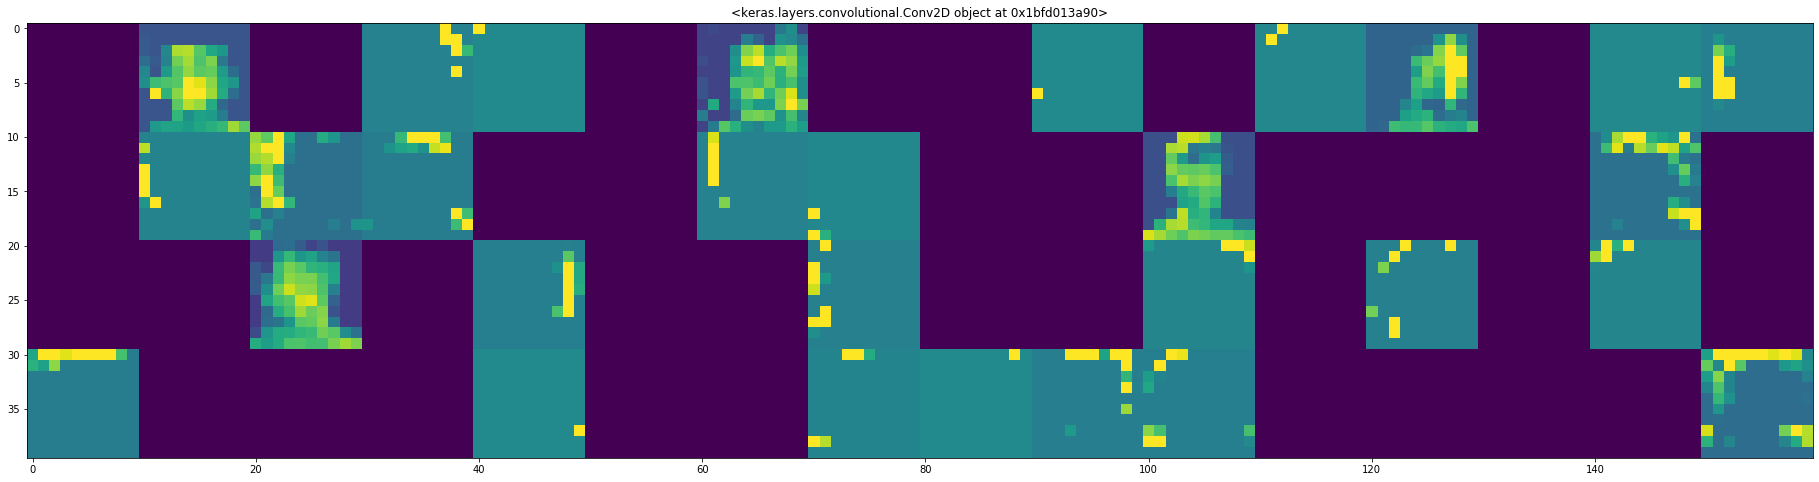

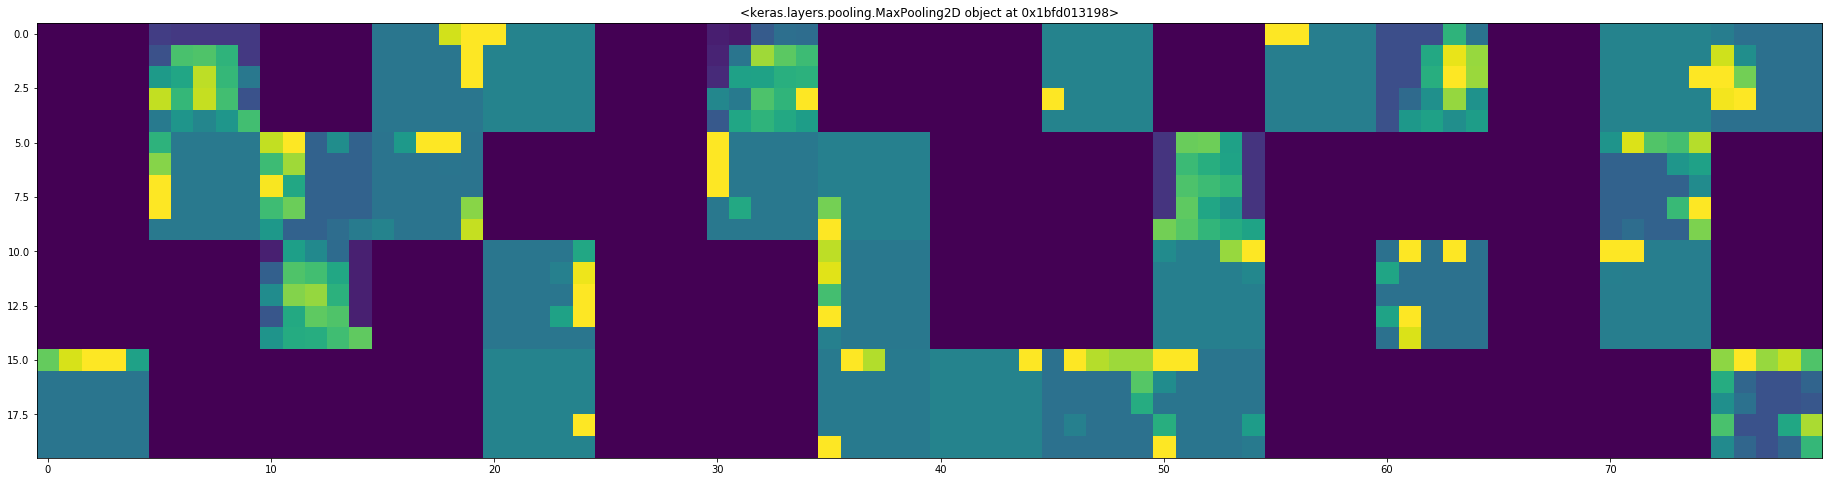

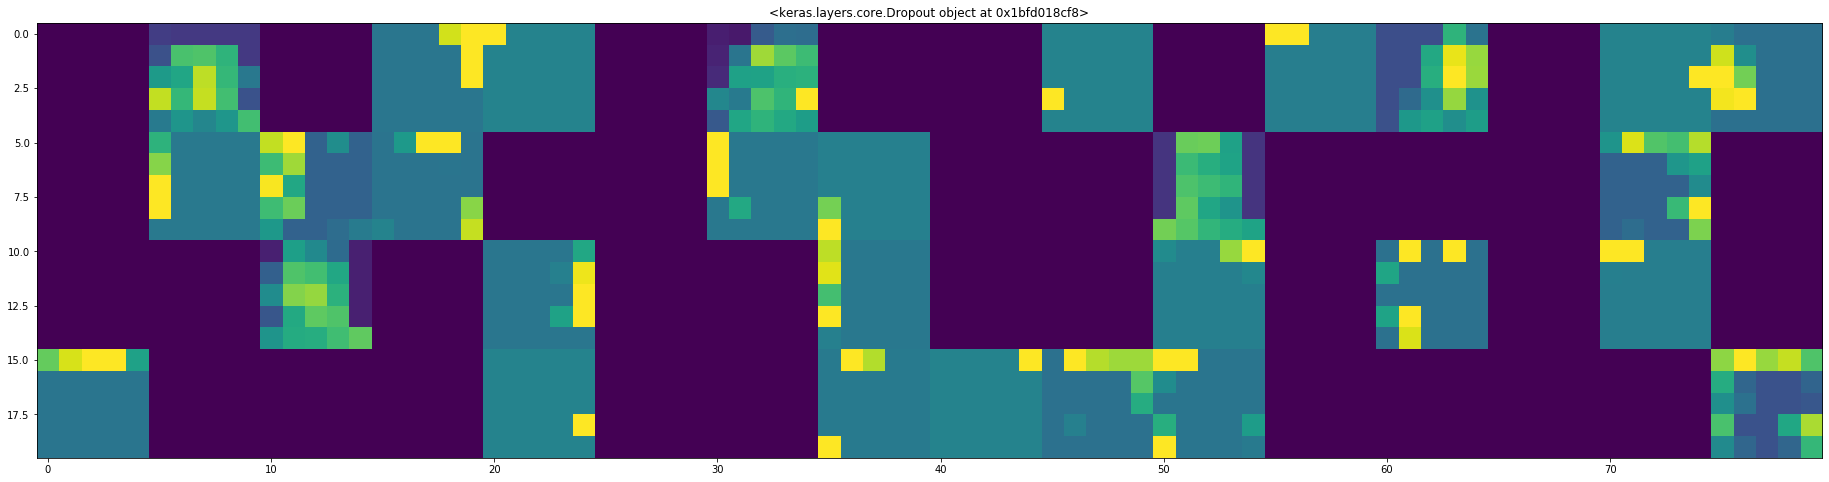

In [1055]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations_face): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Model 2 : maximizing Recall:

In [884]:
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
    
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.model.validation_data[0]))).round()
        val_targ = self.model.validation_data[1]
        val_f1 = f1_score(val_targ, val_predict)
        val_recall = recall_score(val_targ, val_predict)
        val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print("— val_f1: %f — val_precision: %f — val_recall %f")
        return
 
    



In [891]:
metrics = Metrics()

In [890]:
#Model definition: let keras know that we will arrange layers on top of each other 
model2 = Sequential()

# Add 1st layer
model2.add(Conv2D(32,(3, 3), activation='relu', input_shape=(50,50,3), strides=2))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

#Add 2nd layer
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Flatten
model2.add(Flatten())

# Step 4  Full connection
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

# Compiling the CNN
model2.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=[metrics])
#Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients.
#This way, Adadelta continues learning even when many updates have been done. 
#Compared to Adagrad, in the original version of Adadelta you don't have to set an initial learning rate. 
#In this version, initial learning rate and decay factor can be set, as in most other Keras optimizers.

#checkpointer1 = ModelCheckpoint(filepath="best_weights_1.hdf5", 
                               #monitor = f'val_{metrics}',
                               #verbose=1, 
                               #save_best_only=True)

ValueError: ('Could not interpret metric function identifier:', <__main__.Metrics object at 0x1c059432e8>)

In [408]:
model2.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 24, 24, 32)        896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 1600)            

In [419]:
model2.load_weights('best_weights_1.hdf5')

In [889]:
H3 = model2.fit(X_train, Y_train , validation_data=(X_val, Y_val),
          batch_size=400, epochs=20, verbose =1, callbacks=[metrics])

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [420]:
model2.save('shapes_cnn.h5')

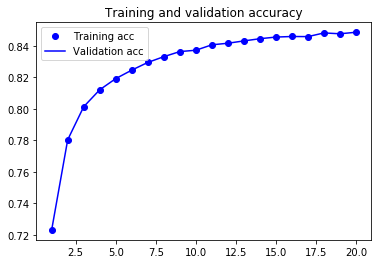

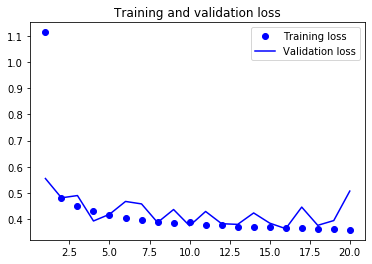

In [421]:
acc = H3.history['recall_m']
val_acc = H3.history['recall_m']
loss = H3.history['loss']
val_loss = H3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [410]:
y_test_pred = model2.predict(X_test)
Y_test_pred_classes = np.argmax(y_test_pred,axis=1)
print(f'f1 score (test): {f1_score(y_test, Y_test_pred_classes)}')
print(f'precision score (test): {precision_score(y_test, Y_test_pred_classes)}')
print(f'recall score (test): {recall_score(y_test, Y_test_pred_classes)}')


f1 score (test): 0.687167696508119
precision score (test): 0.6356675705854203
recall score (test): 0.7477483112334251


In [411]:
y_train_pred = model2.predict(X_train)
Y_train_pred_classes = np.argmax(y_train_pred,axis=1)
print(f'f1 score (train): {f1_score(y_train, Y_train_pred_classes)}')
print(f'precision_score (train): {precision_score(y_train, Y_train_pred_classes)}')
print(f'recall_score (train): {recall_score(y_train, Y_train_pred_classes)}')

f1 score (train): 0.6848011543673891
precision_score (train): 0.6325012607160867
recall_score (train): 0.7465297706353762


In [283]:
y_val_pred = model2.predict(X_val)
Y_val_pred_classes = np.argmax(y_val_pred,axis=1)
print(f'f1 score (val): {f1_score(y_val, Y_val_pred_classes)}')
print(f'precision_score (val): {precision_score(y_val, Y_val_pred_classes)}')
print(f'recall_score (val): {recall_score(y_val, Y_val_pred_classes)}')

f1 score (val): 0.6870058129039246
precision_score (val): 0.7966839725339139
recall_score (val): 0.60387178673437


In [312]:
H3.history

{'val_loss': [0.5637070883040964,
  0.4549141002795619,
  0.4088680221818394,
  0.4279210096640089,
  0.4538955989157592,
  0.43571791560486,
  0.3782924657366897,
  0.4447124894970484,
  0.4125164998521591,
  0.42922750969650875],
 'val_accuracy': [0.7161517143249512,
  0.803981602191925,
  0.8220520615577698,
  0.7921808958053589,
  0.8242320418357849,
  0.8341410756111145,
  0.840843141078949,
  0.847004771232605,
  0.8405728936195374,
  0.8320872187614441],
 'loss': [1.6206004265257985,
  0.5471421941583803,
  0.4763919801797487,
  0.4437018465752092,
  0.4292426439084285,
  0.41551914613005825,
  0.40691489001757813,
  0.39533877469532935,
  0.39337124687083236,
  0.3865461354953289],
 'accuracy': [0.7090755,
  0.7328693,
  0.7730521,
  0.7950863,
  0.8018485,
  0.80994993,
  0.8291795,
  0.83358157,
  0.8347346,
  0.8377974]}

In [693]:
classifier =  Sequential()

In [694]:
# Adding 1st convolutional layer
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (50, 50, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 2, activation = 'softmax'))


In [696]:
classifier.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [697]:
checkpointer = ModelCheckpoint(filepath="best_weights_2.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)